In [26]:
# behavioral results

In [27]:
from os import path
from gradecc.utils.filenames import data_outside

import pandas as pd

dfb = pd.read_csv(path.join(data_outside, 'RL_behavior.csv'))

In [28]:
dfb

,Subject,Block,Trial,Score,ReactionTime,MovementTime,Valid
0,AB1,1,1,53.0,0.365009,0.182444,True
1,AB1,1,2,51.0,0.548555,0.402011,True
2,AB1,1,3,7.0,0.472627,0.269147,True
3,AB1,1,4,0.0,0.557651,0.289636,True
4,AB1,1,5,34.0,0.588884,0.211777,True
...,...,...,...,...,...,...,...
12165,ZN1,2,197,13.0,0.330982,0.149212,True
12166,ZN1,2,198,48.0,0.443281,0.187577,True
12167,ZN1,2,199,68.0,0.454711,0.253610,True
12168,ZN1,2,200,72.0,0.269800,0.162063,True


In [9]:
dfb.Subject.nunique()

45

In [10]:
sbehav = dfb.Subject.unique()

In [12]:
from gradecc.utils.filenames import subjects_filename

subjects_match = pd.read_csv(subjects_filename, delimiter='\t')
subjects_match

,participant_id,dicom_dir,exclude
0,1,AB1,0
1,2,AG1,0
2,3,AH1,0
3,4,AM1,0
4,5,AN1,1
5,6,AP1,0
6,7,AV1,0
7,8,BN1,0
8,9,CD1,0
9,10,CG1,0


In [13]:
set(subjects_match.dicom_dir) - set(sbehav)

{'RG1'}

In [14]:
dfb.Block.nunique()

2

In [19]:
dfb.Trial.max()

201

<AxesSubplot:xlabel='ReactionTime', ylabel='Count'>

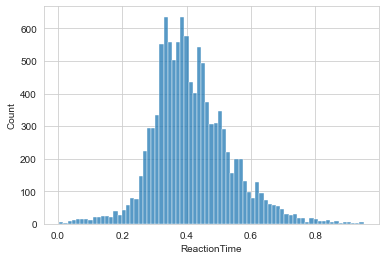

In [15]:
import seaborn as sns

sns.histplot(data=dfb, x='ReactionTime')

<AxesSubplot:xlabel='MovementTime', ylabel='Count'>

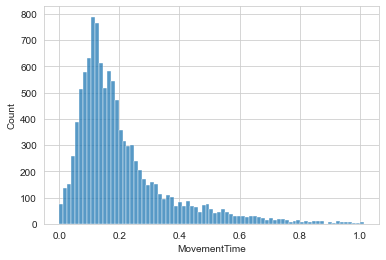

In [16]:
sns.histplot(data=dfb, x='MovementTime')

<AxesSubplot:xlabel='Score', ylabel='Count'>

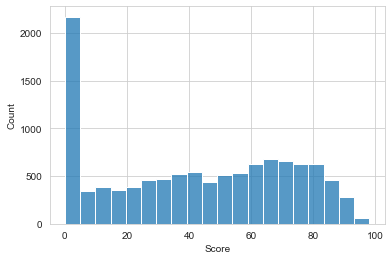

In [17]:
sns.histplot(data=dfb, x='Score')

In [ ]:
# is this the best measure?
# todo get path trace to try others

In [18]:
dfb.Valid.describe()

count     12170
unique        2
top        True
freq      11153
Name: Valid, dtype: object

<AxesSubplot:xlabel='Valid', ylabel='count'>

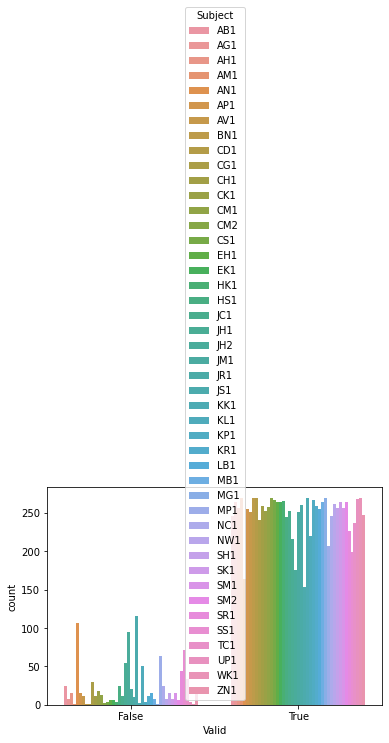

In [36]:
sns.countplot(data=dfb, x='Valid', hue='Subject')

In [38]:
dfb.groupby('Subject').Valid.count()

Subject
AB1    271
AG1    271
AH1    271
AM1    271
AN1    270
AP1    271
AV1    262
BN1    271
CD1    271
CG1    271
CH1    271
CK1    271
CM1    271
CM2    271
CS1    271
EH1    271
EK1    271
HK1    270
HS1    269
JC1    265
JH1    270
JH2    271
JM1    271
JR1    271
JS1    270
KK1    271
KL1    271
KP1    271
KR1    271
LB1    271
MB1    271
MG1    271
MP1    271
NC1    270
NW1    269
SH1    271
SK1    271
SM1    271
SM2    271
SR1    271
SS1    271
TC1    271
UP1    271
WK1    271
ZN1    270
Name: Valid, dtype: int64

In [19]:
dfb.Block.astype(str).describe()

count     12170
unique        2
top           2
freq       9022
Name: Block, dtype: object

In [20]:
dfb[dfb.Block == 1].Trial.max()

70

In [22]:
dfb[dfb.Block == 2].Trial.max()

201

In [23]:
# block 1 is baseline
# block 2 is learning

In [24]:
dfb

,Subject,Block,Trial,Score,ReactionTime,MovementTime,Valid
0,AB1,1,1,53.0,0.365009,0.182444,True
1,AB1,1,2,51.0,0.548555,0.402011,True
2,AB1,1,3,7.0,0.472627,0.269147,True
3,AB1,1,4,0.0,0.557651,0.289636,True
4,AB1,1,5,34.0,0.588884,0.211777,True
...,...,...,...,...,...,...,...
12165,ZN1,2,197,13.0,0.330982,0.149212,True
12166,ZN1,2,198,48.0,0.443281,0.187577,True
12167,ZN1,2,199,68.0,0.454711,0.253610,True
12168,ZN1,2,200,72.0,0.269800,0.162063,True


In [49]:
# get feature importance with different brain MEASURES, connectivity expansion/contraction

In [29]:
dfb

,Subject,Block,Trial,Score,ReactionTime,MovementTime,Valid
0,AB1,1,1,53.0,0.365009,0.182444,True
1,AB1,1,2,51.0,0.548555,0.402011,True
2,AB1,1,3,7.0,0.472627,0.269147,True
3,AB1,1,4,0.0,0.557651,0.289636,True
4,AB1,1,5,34.0,0.588884,0.211777,True
...,...,...,...,...,...,...,...
12165,ZN1,2,197,13.0,0.330982,0.149212,True
12166,ZN1,2,198,48.0,0.443281,0.187577,True
12167,ZN1,2,199,68.0,0.454711,0.253610,True
12168,ZN1,2,200,72.0,0.269800,0.162063,True


In [29]:
# should first make the features

In [54]:
dfb.Subject.unique()

array(['AB1', 'AG1', 'AH1', 'AM1', 'AN1', 'AP1', 'AV1', 'BN1', 'CD1',
       'CG1', 'CH1', 'CK1', 'CM1', 'CM2', 'CS1', 'EH1', 'EK1', 'HK1',
       'HS1', 'JC1', 'JH1', 'JH2', 'JM1', 'JR1', 'JS1', 'KK1', 'KL1',
       'KP1', 'KR1', 'LB1', 'MB1', 'MG1', 'MP1', 'NC1', 'NW1', 'SH1',
       'SK1', 'SM1', 'SM2', 'SR1', 'SS1', 'TC1', 'UP1', 'WK1', 'ZN1'],
      dtype=object)

<AxesSubplot:xlabel='Trial', ylabel='Score'>

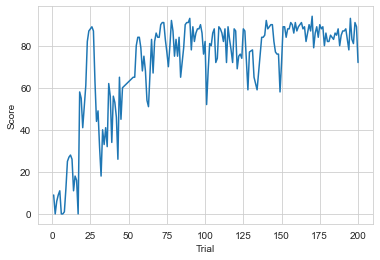

In [61]:
sns.lineplot(data=dfb[(dfb.Subject == 'AP1') & (dfb.Block == 2)],
             x='Trial', y='Score')

<AxesSubplot:xlabel='Trial', ylabel='Score'>

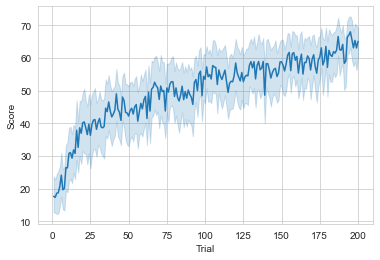

In [64]:
sns.lineplot(data=dfb[dfb.Block == 2], x='Trial', y='Score')

In [98]:
# maybe cluster subjects here
# eg, based on average of last trials

In [99]:
dfb[dfb.Block == 2]

,Subject,Block,Trial,Score,ReactionTime,MovementTime,Valid
70,AB1,2,1,37.0,0.668224,0.322474,True
71,AB1,2,2,11.0,0.505785,0.193614,True
72,AB1,2,3,0.0,0.556503,0.392443,True
73,AB1,2,4,1.0,0.535999,0.153406,True
74,AB1,2,5,12.0,0.450949,0.096948,True
...,...,...,...,...,...,...,...
12165,ZN1,2,197,13.0,0.330982,0.149212,True
12166,ZN1,2,198,48.0,0.443281,0.187577,True
12167,ZN1,2,199,68.0,0.454711,0.253610,True
12168,ZN1,2,200,72.0,0.269800,0.162063,True


<AxesSubplot:xlabel='Subject', ylabel='Score'>

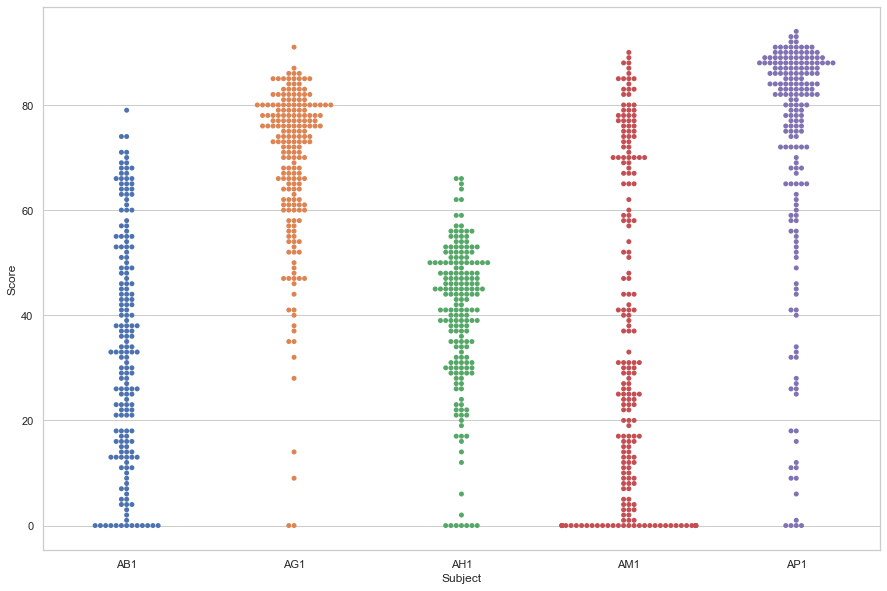

In [75]:
subjects_sublist = ['AB1', 'AG1', 'AH1', 'AM1', 'AP1']

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))

sns.swarmplot(data=dfb[(dfb.Block == 2)
                       & (dfb.Subject.isin(subjects_sublist))
],
             x='Subject', y='Score',
              ax=ax)

In [100]:
# todo learn what to do with many params

def subject_avg_score(df, window='first', metric='Score', rename=None,
                      score_window=40, block=2, agg='mean'):
    if window == 'first':
        sub_window = df.Trial <= score_window
    elif window == 'last':
        max_ = df[df.Block == block].Trial.max()
        sub_window = df.Trial >= max_ - score_window
    if rename is None:
        rename = metric + '_' + agg + '_' + window + str(score_window)

    return df[(df.Block == block) & sub_window] \
        .groupby('Subject')[metric].agg(agg)\
        .rename(rename)

In [101]:
subject_avg_score(dfb, score_window=40, block=2, agg='std',
                  window='last')

Subject
AB1    12.013391
AG1    10.248794
AH1     8.376939
AM1    20.448810
AN1    26.765169
AP1     4.425958
AV1     7.363971
BN1     6.632476
CD1    13.842498
CG1     9.339363
CH1    15.716315
CK1    16.347318
CM1    15.233850
CM2     4.431820
CS1    11.827798
EH1    15.396791
EK1    13.291994
HK1    18.205311
HS1    15.661896
JC1    10.944090
JH1    19.763433
JH2     5.563327
JM1    29.453096
JR1    22.488736
JS1    14.689376
KK1    19.189941
KL1    12.900720
KP1    15.300807
KR1     8.084546
LB1    27.553181
MB1    17.579317
MG1     4.846093
MP1    17.057452
NC1    24.696480
NW1    19.736934
SH1    13.388733
SK1    33.597824
SM1    23.333526
SM2     6.809958
SR1    12.980399
SS1    20.215534
TC1    20.872352
UP1     8.347303
WK1     9.813354
ZN1    21.561355
Name: Score_std_last40, dtype: float64

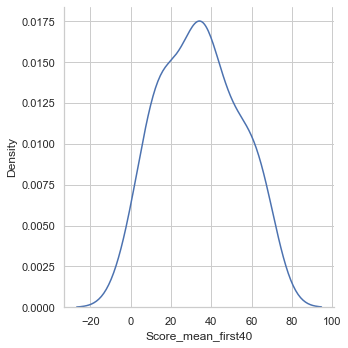

In [93]:
subj_init_score = subject_avg_score(dfb, score_window=40, block=2, agg='mean')
sns.displot(subj_init_score, kind='kde')

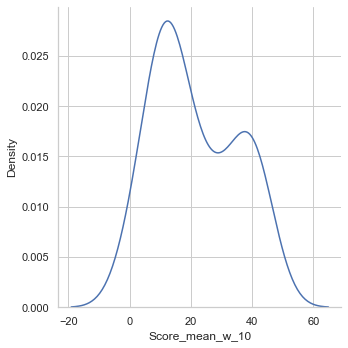

In [79]:
subj_init_score = subject_avg_score(dfb, score_window=10, block=2, agg='mean')
sns.displot(subj_init_score, kind='kde')

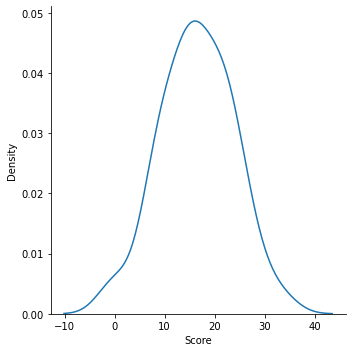

In [93]:
subj_init_score = subject_avg_score(dfb, score_window=10, block=2, agg='std')
sns.displot(subj_init_score, kind='kde')

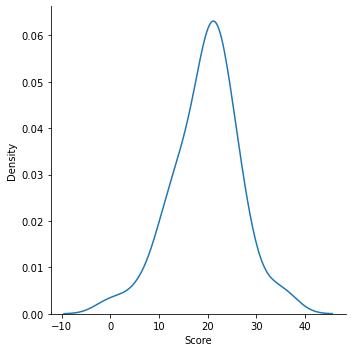

In [94]:
subj_init_score = subject_avg_score(dfb, score_window=40, block=2, agg='std')
sns.displot(subj_init_score, kind='kde')

In [102]:
# they were metrics. Now, measures as features.

In [103]:
from gradecc.compute.measures import get_measures

# merged with subject (str)
dfm = get_measures()
dfm = dfm.merge(subjects_match, left_on='subject', right_on='participant_id')
dfm = dfm[dfm.exclude == 0]
dfm

Reading data from /Users/qasem/PycharmProjects/gradients-rl-task/data/cache/measures.csv


,value,region,subject,epoch,measure,participant_id,dicom_dir,exclude
0,0.515067,7Networks_LH_Vis_1,1,baseline,gradient1,1,AB1,0
1,0.829542,7Networks_LH_Vis_2,1,baseline,gradient1,1,AB1,0
2,0.537888,7Networks_LH_Vis_3,1,baseline,gradient1,1,AB1,0
3,-0.432275,7Networks_LH_Vis_4,1,baseline,gradient1,1,AB1,0
4,0.644839,7Networks_LH_Vis_5,1,baseline,gradient1,1,AB1,0
...,...,...,...,...,...,...,...,...
592795,1.528952,Vermis VI,46,late,eccentricity,46,ZN1,0
592796,1.148793,Vermis VIIIa,46,late,eccentricity,46,ZN1,0
592797,0.494938,Vermis VIIIb,46,late,eccentricity,46,ZN1,0
592798,0.828814,Vermis VIIb,46,late,eccentricity,46,ZN1,0


In [95]:
# for example,

In [112]:
d_pfc19 = dfm[(dfm.region == '7Networks_LH_Default_PFC_19') &
    (dfm.epoch == 'early') & (dfm.measure == 'eccentricity')
]
d_pfc19 = d_pfc19.drop(['participant_id', 'exclude'], axis=1)
# get rid of exclude earlier
d_pfc19

,value,region,subject,epoch,measure,dicom_dir
13587,3.487743,7Networks_LH_Default_PFC_19,1,early,eccentricity,AB1
29187,3.424829,7Networks_LH_Default_PFC_19,2,early,eccentricity,AG1
44787,1.538534,7Networks_LH_Default_PFC_19,3,early,eccentricity,AH1
60387,4.102743,7Networks_LH_Default_PFC_19,4,early,eccentricity,AM1
75987,3.645133,7Networks_LH_Default_PFC_19,6,early,eccentricity,AP1
91587,3.427919,7Networks_LH_Default_PFC_19,7,early,eccentricity,AV1
107187,3.555991,7Networks_LH_Default_PFC_19,8,early,eccentricity,BN1
122787,2.758968,7Networks_LH_Default_PFC_19,9,early,eccentricity,CD1
138387,3.156659,7Networks_LH_Default_PFC_19,10,early,eccentricity,CG1
153987,3.108713,7Networks_LH_Default_PFC_19,11,early,eccentricity,CH1


In [113]:
subj_init_score = subject_avg_score(dfb, score_window=40, block=2, agg='mean')
subj_init_score

Subject
AB1    12.243243
AG1    52.846154
AH1    35.105263
AM1    14.275000
AN1    30.928571
AP1    36.076923
AV1    49.205128
BN1    56.075000
CD1    17.975000
CG1    27.906250
CH1    36.473684
CK1     3.512821
CM1    28.605263
CM2    67.875000
CS1     0.000000
EH1     9.750000
EK1    15.925000
HK1    20.325000
HS1    64.846154
JC1    29.923077
JH1    12.054054
JH2    16.958333
JM1    29.550000
JR1    33.975000
JS1    50.272727
KK1    12.700000
KL1     2.000000
KP1    37.051282
KR1    31.742857
LB1     9.638889
MB1    47.025000
MG1    63.775000
MP1    45.583333
NC1    37.550000
NW1    18.128205
SH1    63.225000
SK1    39.205128
SM1    51.868421
SM2    58.150000
SR1    17.729730
SS1    34.074074
TC1    61.171429
UP1    41.000000
WK1    66.000000
ZN1    38.111111
Name: Score_mean_first40, dtype: float64

In [118]:
# x = d_pfc19.set_index('dicom_dir').value.rename('feature')
x = d_pfc19

dd = x.merge(subj_init_score.reset_index(),
           how='inner', left_on='dicom_dir', right_on='Subject')
dd

,value,region,subject,epoch,measure,dicom_dir,Subject,Score_mean_first40
0,3.487743,7Networks_LH_Default_PFC_19,1,early,eccentricity,AB1,AB1,12.243243
1,3.424829,7Networks_LH_Default_PFC_19,2,early,eccentricity,AG1,AG1,52.846154
2,1.538534,7Networks_LH_Default_PFC_19,3,early,eccentricity,AH1,AH1,35.105263
3,4.102743,7Networks_LH_Default_PFC_19,4,early,eccentricity,AM1,AM1,14.275000
4,3.645133,7Networks_LH_Default_PFC_19,6,early,eccentricity,AP1,AP1,36.076923
5,3.427919,7Networks_LH_Default_PFC_19,7,early,eccentricity,AV1,AV1,49.205128
6,3.555991,7Networks_LH_Default_PFC_19,8,early,eccentricity,BN1,BN1,56.075000
7,2.758968,7Networks_LH_Default_PFC_19,9,early,eccentricity,CD1,CD1,17.975000
8,3.156659,7Networks_LH_Default_PFC_19,10,early,eccentricity,CG1,CG1,27.906250
9,3.108713,7Networks_LH_Default_PFC_19,11,early,eccentricity,CH1,CH1,36.473684


<AxesSubplot:xlabel='value', ylabel='Score'>

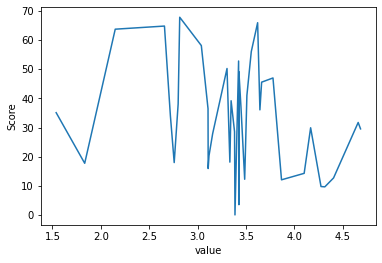

In [120]:
sns.lineplot(data=dd, x='value', y='Score')

In [122]:
from scipy.stats import pearsonr

pearsonr(x=dd['value'], y=dd['Score_mean_first40'])

(-0.2764317848913436, 0.09767983484271525)

In [121]:
def corr(data, x, y):
    return pearsonr(data[x], data[y])

In [123]:
subj_init_score

Subject
AB1    12.243243
AG1    52.846154
AH1    35.105263
AM1    14.275000
AN1    30.928571
AP1    36.076923
AV1    49.205128
BN1    56.075000
CD1    17.975000
CG1    27.906250
CH1    36.473684
CK1     3.512821
CM1    28.605263
CM2    67.875000
CS1     0.000000
EH1     9.750000
EK1    15.925000
HK1    20.325000
HS1    64.846154
JC1    29.923077
JH1    12.054054
JH2    16.958333
JM1    29.550000
JR1    33.975000
JS1    50.272727
KK1    12.700000
KL1     2.000000
KP1    37.051282
KR1    31.742857
LB1     9.638889
MB1    47.025000
MG1    63.775000
MP1    45.583333
NC1    37.550000
NW1    18.128205
SH1    63.225000
SK1    39.205128
SM1    51.868421
SM2    58.150000
SR1    17.729730
SS1    34.074074
TC1    61.171429
UP1    41.000000
WK1    66.000000
ZN1    38.111111
Name: Score_mean_first40, dtype: float64

In [124]:
dfm_ = dfm[(dfm.epoch == 'early') & (dfm.measure == 'eccentricity')].merge(subj_init_score.reset_index(), how='inner', left_on='dicom_dir', right_on='Subject')
dfm_

,value,region,subject,epoch,measure,participant_id,dicom_dir,exclude,Subject,Score_mean_first40
0,1.750906,7Networks_LH_Cont_Cing_1,1,early,eccentricity,1,AB1,0,AB1,12.243243
1,0.374219,7Networks_LH_Cont_Cing_2,1,early,eccentricity,1,AB1,0,AB1,12.243243
2,1.303648,7Networks_LH_Cont_Cing_3,1,early,eccentricity,1,AB1,0,AB1,12.243243
3,1.032812,7Networks_LH_Cont_Cing_4,1,early,eccentricity,1,AB1,0,AB1,12.243243
4,0.821108,7Networks_LH_Cont_Cing_5,1,early,eccentricity,1,AB1,0,AB1,12.243243
...,...,...,...,...,...,...,...,...,...,...
38475,1.011658,Vermis VI,46,early,eccentricity,46,ZN1,0,ZN1,38.111111
38476,1.021005,Vermis VIIIa,46,early,eccentricity,46,ZN1,0,ZN1,38.111111
38477,0.742754,Vermis VIIIb,46,early,eccentricity,46,ZN1,0,ZN1,38.111111
38478,0.705703,Vermis VIIb,46,early,eccentricity,46,ZN1,0,ZN1,38.111111


In [127]:
38480 == 37 * 1040

True

In [128]:
def _expand_p_r(df):
    return pd.DataFrame(df.tolist(), columns=['r', 'p'], index=df.index)

In [129]:
dfm = dfm.merge(subj_init_score.reset_index(), how='inner', left_on='dicom_dir', right_on='Subject')
dfm

,value,region,subject,epoch,measure,participant_id,dicom_dir,exclude,Subject,Score_mean_first40
0,0.515067,7Networks_LH_Vis_1,1,baseline,gradient1,1,AB1,0,AB1,12.243243
1,0.829542,7Networks_LH_Vis_2,1,baseline,gradient1,1,AB1,0,AB1,12.243243
2,0.537888,7Networks_LH_Vis_3,1,baseline,gradient1,1,AB1,0,AB1,12.243243
3,-0.432275,7Networks_LH_Vis_4,1,baseline,gradient1,1,AB1,0,AB1,12.243243
4,0.644839,7Networks_LH_Vis_5,1,baseline,gradient1,1,AB1,0,AB1,12.243243
...,...,...,...,...,...,...,...,...,...,...
577195,1.528952,Vermis VI,46,late,eccentricity,46,ZN1,0,ZN1,38.111111
577196,1.148793,Vermis VIIIa,46,late,eccentricity,46,ZN1,0,ZN1,38.111111
577197,0.494938,Vermis VIIIb,46,late,eccentricity,46,ZN1,0,ZN1,38.111111
577198,0.828814,Vermis VIIb,46,late,eccentricity,46,ZN1,0,ZN1,38.111111


In [131]:
dfpr = _expand_p_r(
    dfm.groupby(['epoch', 'measure', 'region']).apply(corr, 'value', 'Score_mean_first40')
)

In [132]:
dfpr

r         p
epoch    measure      region                                      
baseline eccentricity 7Networks_LH_Cont_Cing_1  0.158239  0.349580
                      7Networks_LH_Cont_Cing_2 -0.392675  0.016216
                      7Networks_LH_Cont_Cing_3  0.087009  0.608607
                      7Networks_LH_Cont_Cing_4  0.073385  0.666001
                      7Networks_LH_Cont_Cing_5  0.211794  0.208243
...                                                  ...       ...
late     gradient4    Vermis VI                 0.135839  0.422758
                      Vermis VIIIa              0.152695  0.366932
                      Vermis VIIIb              0.134145  0.428622
                      Vermis VIIb               0.191109  0.257192
                      Vermis X                  0.152941  0.366150

[15600 rows x 2 columns]

In [134]:
15600 / 1040

15.0

In [184]:
from gradecc.utils.filenames import data_inside

# dfpr.to_csv(path.join(data_inside, 'behavioral_pr.csv'))

In [135]:
dfpr.xs(('baseline', 'gradient1'))

,r,p
region,,
7Networks_LH_Cont_Cing_1,0.214493,0.202369
7Networks_LH_Cont_Cing_2,0.269608,0.106589
7Networks_LH_Cont_Cing_3,0.146985,0.385329
7Networks_LH_Cont_Cing_4,-0.076469,0.652828
7Networks_LH_Cont_Cing_5,-0.095267,0.574883
...,...,...
Vermis VI,-0.324478,0.050071
Vermis VIIIa,0.075964,0.654979
Vermis VIIIb,-0.023122,0.891952


In [ ]:
# todo make function to match by index

In [198]:
from gradecc.plot import plot_subc, plot_cortex

def _plot_behav_corr():
    color_range = (-1, 1)
    for grad in ['eccentricity', 'gradient1', 'gradient2', 'gradient3', 'gradient4']:
        for epoch in ['baseline', 'early', 'late']:
            data = dfpr.xs((epoch, grad)).reset_index()

            # plot_cortex(data, value='r', mask='p',
            #             color_map='bwr', color_range=color_range,
            #             text=('cortical behavioural ' + grad + ' ' + epoch.upper()),
            #             save_figure=True)
            #
            # plot_subc(data, value='r',
            # color_map='bwr', color_range=color_range,
            #           text=('subcortical behavioural ' + grad + ' ' + epoch.upper()))


_plot_behav_corr()

In [136]:
dfpr[dfpr.p < 0.05].reset_index()

,epoch,measure,region,r,p
0,baseline,eccentricity,7Networks_LH_Cont_Cing_2,-0.392675,0.016216
1,baseline,eccentricity,7Networks_LH_Default_PFC_31,0.385542,0.018444
2,baseline,eccentricity,7Networks_LH_Default_PFC_5,0.341043,0.038860
3,baseline,eccentricity,7Networks_LH_Default_Par_12,-0.390610,0.016836
4,baseline,eccentricity,7Networks_LH_Default_pCunPCC_12,0.325153,0.049568
...,...,...,...,...,...
685,late,gradient4,7Networks_RH_Vis_35,0.389169,0.017281
686,late,gradient4,7Networks_RH_Vis_38,0.372160,0.023316
687,late,gradient4,7Networks_RH_Vis_43,0.464856,0.003746
688,late,gradient4,7Networks_RH_Vis_45,0.344857,0.036592


In [ ]:
# apply FDR

In [137]:
# early ecc significant in subc
[
'Vermis VIIb',
'Vermis VIIIa',
'Right VIIIa',
'Right Hippocampus',
'Left Pallidum',
]

['Vermis VIIb',
 'Vermis VIIIa',
 'Right VIIIa',
 'Right Hippocampus',
 'Left Pallidum']